# SI 618 - Homework #1: Data Manipulation

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
MY_UNIQNAME = 'austinam'

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel!**

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

In [42]:
import numpy as np
import pandas as pd
%matplotlib inline

In [347]:
olympic_cities = pd.read_html('http://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities', match='.+', flavor=None, header=None, index_col=None,  skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
city_info = olympic_cities[1]
headers = city_info.iloc[0]
city_info = city_info[1:]
city_info.columns = headers
city_info.head(2)

,City,Country,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Year,Opening Ceremony,Closing Ceremony
1,Athens,Greece,Europe,NaN,NaN,NaN,NaN,1896,April 6,April 15
2,Paris,France,Europe,NaN,NaN,NaN,NaN,1900,May 14,October 28


In [348]:
region_info = pd.read_csv("noc_regions.csv")
region_info.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [349]:
athlete_info = pd.read_csv("athlete_events.csv")
athlete_info.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [351]:
city_row_column = city_info.shape
print('City data frame shape')
print(city_row_column)
regions_row_column = region_info.shape
regions_desc = region_info.describe()
print('Regions data frame shape')
print(regions_row_column)
#print(regions_desc)
athletes_row_column = athlete_info.shape
athletes_desc = athlete_info.describe()
print('Athlete data frame shape/description')
print(athletes_row_column)
print(athletes_desc)
sorted = athlete_info.sort_values('Team')
sorted.head()

City data frame shape
(68, 10)
Regions data frame shape
(230, 3)
Athlete data frame shape/description
(271116, 15)
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
67840,34666,Harald Fereberger,M,23.0,167.0,70.0,30. Februar,AUT,1952 Summer,1952,Summer,Helsinki,Sailing,Sailing Mixed Two Person Keelboat,NaN
254456,127384,Harald von Musil,M,44.0,176.0,NaN,30. Februar,AUT,1952 Summer,1952,Summer,Helsinki,Sailing,Sailing Mixed Two Person Keelboat,NaN
64703,33106,Jos Eustaquio Luis Francisco Escandn y Barrn,M,38.0,NaN,NaN,A North American Team,MEX,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
263255,131733,William Hayden Wright,M,NaN,NaN,NaN,A North American Team,USA,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze
64706,33109,Jos Pablo Eustaquio Manuel Francisco Escandn y...,M,44.0,NaN,NaN,A North American Team,MEX,1900 Summer,1900,Summer,Paris,Polo,Polo Men's Polo,Bronze



A. How many number rows and columns do you see in each data frame?
In the data frame with information from the Wikipedia page about Olympic game host cities, there are 68 rows and 10 columns. In the data frame containing information about regions, there are 230 rows and 3 columns. In the data frame containing information about athletes and the events they participated in there are 27,1116 rows and 15 columns.

B. Are there any other interesting descriptive details?
In terms of athletes who competed in the Olympics, the youngest competitor was 10 years old, and the oldest was 97 years old. The tables containing the different data sets are not clean, and there are some missing values. For example, in the athlete table there are dates listed as the Team for some individuals, and others are listed as being from just 'A North American Team'. 

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [95]:
#print(athlete_info.Sex.unique())
#print(athlete_info.Sex.isna().sum())
male_ath = athlete_info[(athlete_info.Sex=='M')]
male = len(male_ath.Name.unique())
print(male)

100979


In [97]:
female_ath = athlete_info[(athlete_info.Sex=='F')]
female = len(female_ath.Name.unique())
print(female)

33808


In [98]:
female/male

0.33480228562374353

The overall ratio of female to male athletes in the Olympics is .33, meaning that more males have competed. This number takes into account only the unique males and females who competed, so if someone competed in multiple events or in different years, they are still only counted once. 

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [41]:
print(athlete_info.Name.value_counts().head(1))
rob_info = athlete_info[(athlete_info.Name=="Robert Tait McKenzie")]
print(rob_info.Event.value_counts())
print(rob_info.Year.describe())
print(rob_info.Team.value_counts())

Robert Tait McKenzie    58
Name: Name, dtype: int64
Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing                         1
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Art Competitions Mixed Sculpturing, Medals                 1
Name: Event, dtype: int64
count      58.000000
mean     1931.793103
std         3.851446
min      1912.000000
25%      1932.000000
50%      1932.000000
75%      1932.000000
max      1948.000000
Name: Year, dtype: float64
Canada    58
Name: Team, dtype: int64


The athlete that competed in the most number of events was Robert Tait McKenzie, who participated in different Art Competitions Mixed Sculpturing events (statues, medals, medals and reliefs, and unknown). He competed from the years 1912-1948 and represented Canada. 

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [99]:
#athlete_info.Sport.value_counts().plot.hist(bins=50)
median_info = athlete_info.groupby(['Sport'])['Age'].median().sort_values().tail(15)
median_info

Sport
Fencing             28.0
Beach Volleyball    29.0
Sailing             29.0
Tug-Of-War          29.0
Skeleton            29.0
Curling             30.0
Motorboating        31.0
Jeu De Paume        31.0
Croquet             33.0
Equestrianism       33.0
Shooting            33.0
Polo                35.0
Alpinism            38.0
Art Competitions    45.0
Roque               59.0
Name: Age, dtype: float64

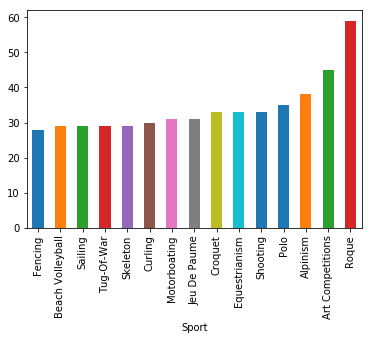

In [100]:
median_info.plot.bar()

Roque is the sport with the highest median age, which was 59 years old. 

### 10 pt: In which events has Jamaica won the most medals?

In [62]:
print(athlete_info.Medal.unique())
jam_info = athlete_info[(athlete_info.Team=="Jamaica")]
jam_medals = jam_info[(jam_info.Medal=="Gold") | (jam_info.Medal=="Bronze") | (jam_info.Medal=="Silver")]
jam_medals.Event.value_counts()

[nan 'Gold' 'Bronze' 'Silver']


Athletics Women's 4 x 100 metres Relay    28
Athletics Men's 4 x 400 metres Relay      27
Athletics Women's 4 x 400 metres Relay    27
Athletics Men's 4 x 100 metres Relay      16
Athletics Women's 100 metres              13
Athletics Women's 200 metres              12
Athletics Men's 100 metres                 8
Athletics Men's 200 metres                 7
Athletics Men's 400 metres                 5
Athletics Women's 400 metres Hurdles       3
Athletics Women's 400 metres               3
Athletics Men's 110 metres Hurdles         2
Athletics Men's 400 metres Hurdles         2
Athletics Men's 800 metres                 2
Athletics Men's Long Jump                  1
Cycling Men's 1,000 metres Time Trial      1
Name: Event, dtype: int64

Jamaica has won the most medals in events that are related to track, including relay races and individual races. The top four events with the highest number of medals are relay races where four athletes participated, which is why the numbers are so large. 

### 10 pt: Which countries have more female medalists than male medalists?

In [104]:
#gender_info = pd.DataFrame(athlete_info.Team.value_counts().reset_index().values, columns=["Year", "AggregateCrime"])
#gender_info = pd.DataFrame({'count' : athlete_info.groupby( [ "Team", "Sex"] ).size()}).reset_index()
medalists = athlete_info[(athlete_info.Medal=="Gold") | (athlete_info.Medal=="Silver") | (athlete_info.Medal=="Bronze")]
gender_info = pd.DataFrame({'Male_count':medalists[(medalists.Sex=='M')].groupby("NOC").size(), 'Female_count':medalists[(medalists.Sex=='F')].groupby("NOC").size()}).reset_index()
gender_info[(gender_info.Female_count>gender_info.Male_count)]

,index,Male_count,Female_count
14,BLR,62.0,77.0
22,CHN,335.0,654.0
68,JAM,71.0,86.0
80,LIE,4.0,5.0
103,PER,3.0,12.0
107,PRK,33.0,34.0
110,ROU,298.0,355.0
115,SGP,2.0,7.0
138,UKR,94.0,105.0


The countries that had more female medalists than male medalists were Belarus, China, Jaimaica, Liechtenstien, Peru, North Korea, Romania, Singapore and Ukraine. 

### 10 pt: Which country won the most medal points in each of the 2014 Winter Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [121]:
data_2014 = athlete_info[(athlete_info.Games=="2014 Winter")]
#data_2014["Score"] = data_2014["Medal"].astype('category')
#data_2014.head()
def medal_to_points(x):
    if x=='Gold':
        return 3
    if x=='Silver':
        return 2
    if x=='Bronze':
        return 1
#df['score_num'] = df['score'].apply(score_to_numeric)
#df
data_2014['Points'] = data_2014.loc[:,'Medal'].apply(medal_to_points)
#print(data_2014.tail(20))
data_2014.groupby(['NOC'])['Points'].sum().sort_values().tail()

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


NOC
GER     78.0
SWE     99.0
USA    114.0
RUS    156.0
CAN    226.0
Name: Points, dtype: float64

Canada won the most medal points in the 2014 Winter Olympics. They won 226 points, which was much higher than other teams coming in second and third, which were Russia (having 156 points) and USA (receiving 114 points). Canada won a gold in hockey, which was a team event, so every player was awarded a medal. This could potentially be the reason why they were awarded so many more points than the other teams. 

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [344]:
summer_olympic_cities = pd.read_html('http://en.wikipedia.org/wiki/Summer_Olympic_Games#List_of_Summer_Olympic_Games', match='.+', flavor=None, header=None, index_col=None,  skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
s_city_info = summer_olympic_cities[7]
s_headers = s_city_info.iloc[0]
s_city_info = s_city_info[2:]
s_city_info.columns = s_headers
s_city_info.columns.values[12] = "winner"
s_city_info.columns.values[13] = "etc"
s_city_info = s_city_info.rename(columns={'Olympiad': 'Games'})
s_city_info = s_city_info.dropna(axis=0, subset=['Dates'])
s_city_info['Host'] = s_city_info['Host'].str.split(',')
s_city_info['Host'] = s_city_info['Host'].apply(lambda x:x[1])
s_city_info['Year'] = s_city_info['Year'].astype(str).astype(int)
#s_city_info['New_host']=s_city_info['Host'][:]
#s_city_info[['Host','Country']] = s_city_info['Host'].str.split(',',expand=True)

In [296]:
winter_olympic_cities = pd.read_html('http://en.wikipedia.org/wiki/Winter_Olympic_Games#List_of_Winter_Olympic_Games', match='.+', flavor=None, header=None, index_col=None,  skiprows=None, attrs=None, parse_dates=False, tupleize_cols=None, thousands=', ', encoding=None, decimal='.', converters=None, na_values=None, keep_default_na=True, displayed_only=True)
w_city_info = winter_olympic_cities[4]
w_headers = w_city_info.iloc[0]
w_city_info = w_city_info[2:]
w_city_info.columns = w_headers
w_city_info.columns.values[12] = "winner"
w_city_info.columns.values[13] = "etc"
w_city_info = w_city_info.rename(columns={'Disci-plines': 'Disciplines'})
w_city_info = w_city_info.rename(columns={'Top Nation': 'Top nation'})
w_city_info = w_city_info.dropna(axis=0, subset=['Dates'])
w_city_info['Host'] = w_city_info['Host'].str.split(',')
w_city_info['Host'] = w_city_info['Host'].apply(lambda x:x[1])
w_city_info['Year'] = w_city_info['Year'].astype(str).astype(int)


In [350]:
gold_medals_summer = athlete_info[(athlete_info.Medal=="Gold") & (athlete_info.Season=="Summer")]
gold_medals_winter = athlete_info[(athlete_info.Medal=="Gold") & (athlete_info.Season=="Winter")]


In [383]:
#country_sport_df = country_df.merge(sport_df, on='country_id', how='inner')
#country_university_df = university_df.merge(sport_df, on='country_id', how='inner').drop(['country_id', 'sport_id', 'university_id'], axis=1)
new_gold_medals_summer = gold_medals_summer.merge(region_info, how='inner', on='NOC')
#new_gold_medals_summer.head()
new_gold_medals_winter = gold_medals_winter.merge(region_info, how='inner', on='NOC')


#SUMMER
s_gold_host = new_gold_medals_summer.merge(s_city_info, how='inner', on='Year')
s_gold_host['region'] = s_gold_host['region'].str.strip()
s_gold_host['Host'] = s_gold_host['Host'].str.strip()
s_gold_host['Team'] = s_gold_host['Team'].str.strip()
sum_gold=s_gold_host.drop(columns=['Age','Height','Weight','Competitors','Sports','Disciplines','Event', 'Dates','Nations', 'Events','etc','notes','Opened by'])
sum_gold.head()


#WINTER
w_gold_host = new_gold_medals_winter.merge(w_city_info, how='inner', on='Year')
w_gold_host['region'] = w_gold_host['region'].str.strip()
w_gold_host['Host'] = w_gold_host['Host'].str.strip()
w_gold_host['Team'] = w_gold_host['Team'].str.strip()
wint_gold=w_gold_host.drop(columns=['Age','Height','Weight','Competitors','Sports','Disciplines','Event', 'Dates','Nations', 'Events','etc','notes','Opened by'])
#wint_gold.head()


In [388]:
#sum_gold['Team'] = np.where(sum_gold['Team'] == 'United States', 'USA')

sum_gold.loc[sum_gold['Team'] == 'United States', 'Team'] = 'USA'
sum_gold.loc[sum_gold['Host'] == 'United States', 'Host'] = 'USA'
sum_gold['match'] = np.where(sum_gold['Host'] == sum_gold['region'], 1,0)
summer_match = sum_gold[(sum_gold.match==1)]


wint_gold.loc[wint_gold['Team'] == 'United States', 'Team'] = 'USA'
wint_gold.loc[wint_gold['Host'] == 'United States', 'Host'] = 'USA'
wint_gold['match'] = np.where(wint_gold['Host'] == wint_gold['region'], 1,0)
winter_match = wint_gold[(wint_gold.match==1)]

In [385]:
#WINTER HOST WINNER TOTALS
sums_match_w = winter_match.groupby(['Year'])['match'].count()
match_wint = pd.DataFrame(sums_match_w)

#SUMMER HOST WINNER TOTALS
sums_match_s = summer_match.groupby(['Year'])['match'].count()
match_sum = pd.DataFrame(sums_match_s)
print(match_sum)

      match
Year       
1896     10
1900     52
1904    128
1912    103
1920     57
1924     37
1928     20
1932     81
1936     93
1952      8
1956     28
1960     36
1964     32
1968      3
1984    186
1988     28
1992     48
1996    159
2000     60
2004      8
2008     74
2016     36


In [389]:
count_year_winter = wint_gold.groupby(['Year'])['Medal'].count()
total_wint = pd.DataFrame(count_year_winter)
count_year_summer = sum_gold.groupby(['Year'])['Medal'].count()
total_sum = pd.DataFrame(count_year_summer)

In [390]:
#merged summer
last_summer = total_sum.merge(match_sum, how='outer', on='Year')
new_summer = last_summer.fillna(0)
new_summer["Proportion"] = new_summer['match']/new_summer['Medal']
print('FINAL SUMMER TABLE OF PROPORTIONS')
print(new_summer)
print('')
#merged winter
last_winter = total_wint.merge(match_wint, how='outer', on='Year')
new_winter = last_winter.fillna(0)
new_winter["Proportion"] = new_winter['match']/new_winter['Medal']
print('FINAL WINTER TABLE OF PROPORTIONS')
print(new_winter)

FINAL SUMMER TABLE OF PROPORTIONS
      Medal  match  Proportion
Year                          
1896     62   10.0    0.161290
1900    201   52.0    0.258706
1904    173  128.0    0.739884
1908    294    0.0    0.000000
1912    326  103.0    0.315951
1920    493   57.0    0.115619
1924    277   37.0    0.133574
1928    245   20.0    0.081633
1932    229   81.0    0.353712
1936    312   93.0    0.298077
1948    289    0.0    0.000000
1952    306    8.0    0.026144
1956    302   28.0    0.092715
1960    309   36.0    0.116505
1964    347   32.0    0.092219
1968    359    3.0    0.008357
1972    404    0.0    0.000000
1976    438    0.0    0.000000
1980    457    0.0    0.000000
1984    497  186.0    0.374245
1988    520   28.0    0.053846
1992    559   48.0    0.085868
1996    608  159.0    0.261513
2000    663   60.0    0.090498
2004    664    8.0    0.012048
2008    671   74.0    0.110283
2012    632    0.0    0.000000
2016    664   36.0    0.054217

FINAL WINTER TABLE OF PROPORTIONS
 

In [392]:
#print(new_summer.describe())
#print(new_winter.describe())

The proportion of golds won by the host team are listed above in the two tables, one covers the summer Olympics and one has information on the winter Olympics. 

Overall, the average number of medals won by the host team was .14 in the summer games and .11 in the winter games. The highest proportions were .74 for summer games and .39 for winter games. 

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas